<a href="https://colab.research.google.com/github/khixson1/Food_Sales_Prediction/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food_Sales_Predictions

Kim Hixson

In [184]:
# Mount Drive in Google's Collaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
# import pandas library
# upload sales_prediction.csv data
# read .csv into collaboratory
# check dataframe using head function

import pandas as pd
filename = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo/Week_1/Data_Uploads/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [186]:
# 1) How many rows and columns?

print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))


The dataset has 8523 rows and 12 columns


In [187]:
# 2) What are the datatypes of each variable?

display(df.dtypes)



Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [188]:
# 3) Are there duplicates? If so, drop any duplicates. (There seems to be no duplicate rows)

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

df = df.drop_duplicates()



Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


In [189]:
# 4) Identify missing values.

print(df.isnull().sum().sort_values(ascending = False))

null_df = df[df.isnull().any(axis = 1)]

null_df

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [190]:
null_df.groupby(['Outlet_Establishment_Year'])[['Item_Weight']].count()
df.groupby(['Outlet_Establishment_Year'])[['Item_Weight']].count()

,Item_Weight
Outlet_Establishment_Year,
1985,0
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


In [191]:
# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
# 'Outlet_Size' defines Tier 3 Supermarkets as 'Medium' and Tier 1 Grocery Stores as 'Small'. It appears that only Supermaket Type 1 has NaN Outlet sizes but is listed with 
# a "High" Outlet Size elsewhere in the dataset. It seems appropriate to impute these 'Outlet_Size' NaN values as 'High'.
# Item_Weight also has missing values.  It appears as though the missing values only occur when 'Outlet_Establishment_Year' = 1985. Weight is probably
# similar between similar products from 1985 to 1987. It would perhaps be appropriate to impute the same weight for the same product from 1987 data. We can do 
# this by sorting the dataframe by item weight and year and then do a forward fill using the 1987 data.


# Imputation of Outlet_Size
df2 = pd.DataFrame(df.loc[:, 'Outlet_Size'].fillna('High'))
df['Outlet_Size'] = df2['Outlet_Size']

# Sort data based on item identifier, outlet establishment year and weight, and impute 1985 data with 1987 data
df_sort = df.sort_values(['Item_Identifier', 'Outlet_Establishment_Year', 'Item_Weight'], ascending=False)
df3 = pd.DataFrame(df_sort.loc[:, 'Item_Weight'].fillna(method='ffill'))
df['Item_Weight'] = df3['Item_Weight']
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [192]:
# 6) Confirm that there are no missing values after addressing them.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [193]:
# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent). 
# GroupBy of df shows that there are 3 different notations for low fat, and two notations for regular

df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
df

df.groupby(['Item_Fat_Content']).count()




,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,,,,,,,,,,,
Low Fat,5517,5517,5517,5517,5517,5517,5517,5517,5517,5517,5517
Regular,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006,3006


In [194]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

# Separating numerical data in df
df.dtypes == 'object'

num_vars = df.columns[df.dtypes != 'object']

# Showing summary statistics of each
df[num_vars].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873262,0.066132,140.992782,1997.831867,2181.288914
std,4.646486,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [195]:
# 9) Import graphing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

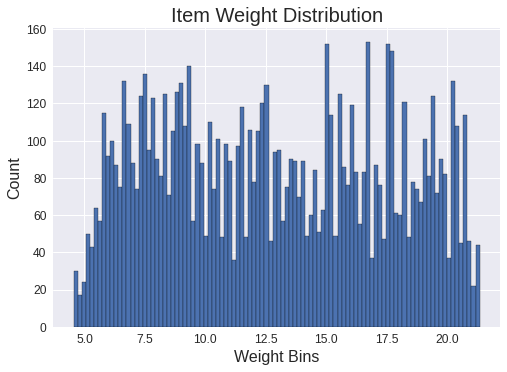

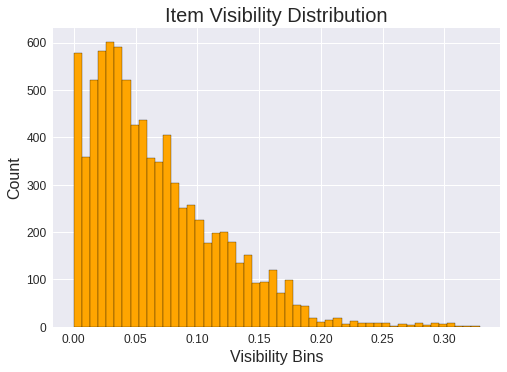

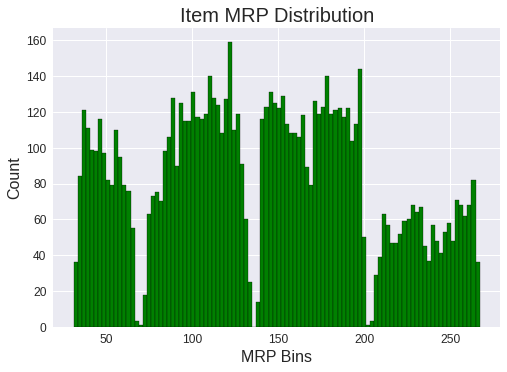

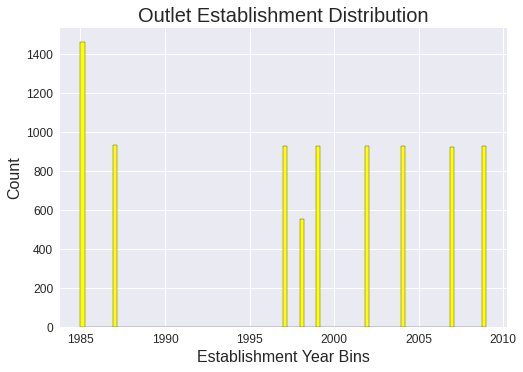

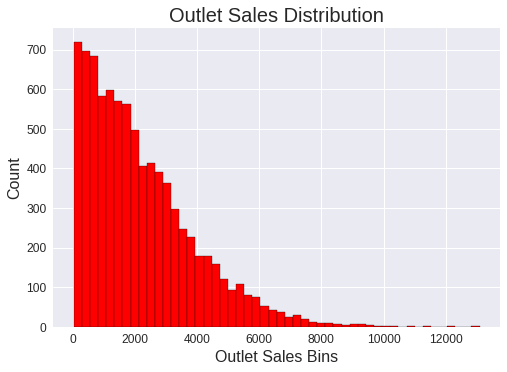

In [196]:
# 10) Create histograms of numberical data: "Item_Weight", "Item_Visibility", "Item_MRP", 
#      "Outlet_Establishment_Year", and "Item_Outlet_Sales"

# Histogram of "Item_Weight"
df['Item_Weight'].hist(bins = 100, edgecolor = 'black');
plt.title("Item Weight Distribution", fontsize = 20);
plt.xlabel("Weight Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Item_Visibility"
df['Item_Visibility'].hist(bins = 50, edgecolor = 'black', color = 'orange');
plt.title("Item Visibility Distribution", fontsize = 20);
plt.xlabel("Visibility Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Item_MRP"
df['Item_MRP'].hist(bins = 100, edgecolor = 'black', color = 'green');
plt.title("Item MRP Distribution", fontsize = 20);
plt.xlabel("MRP Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Outlet_Extablishment_Year"
df['Outlet_Establishment_Year'].hist(bins = 100, edgecolor = 'black', color = 'yellow');
plt.title("Outlet Establishment Distribution", fontsize = 20);
plt.xlabel("Establishment Year Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Histogram of "Item_Outlet_Sales"
df['Item_Outlet_Sales'].hist(bins = 50, edgecolor = 'black', color = 'red');
plt.title("Outlet Sales Distribution", fontsize = 20);
plt.xlabel("Outlet Sales Bins", fontsize = 16);
plt.ylabel("Count", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

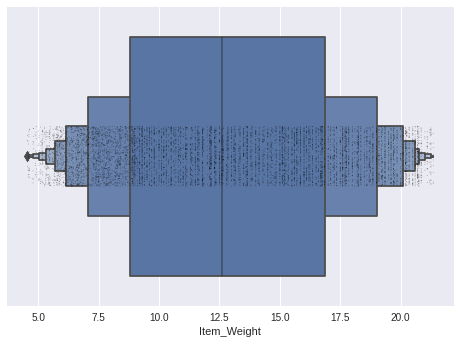

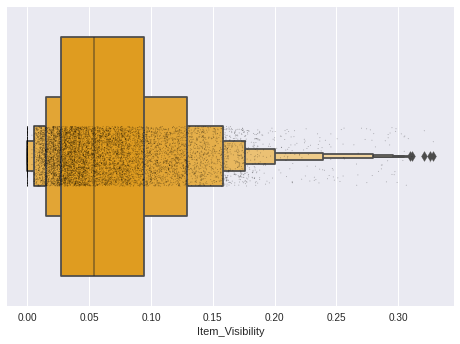

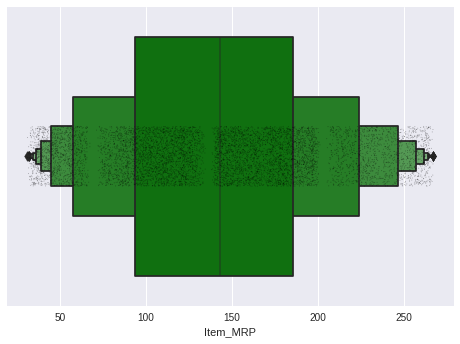

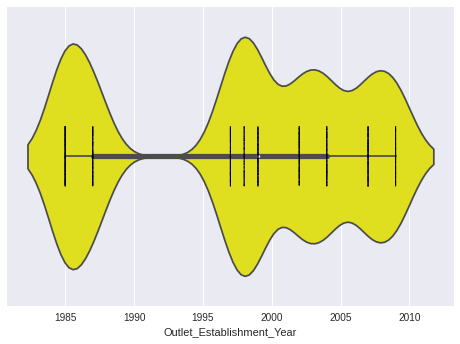

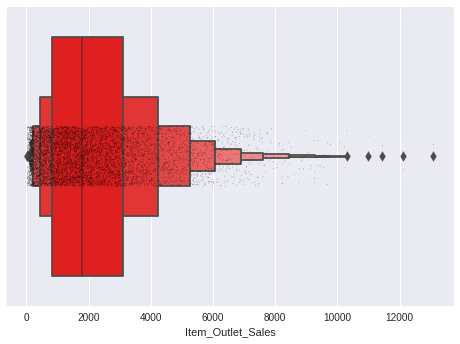

In [197]:
# 11) Create boxplots to view statistical summaries of various features in "Item_Weight", "Item_Visibility", "Item_MRP", 
#      "Outlet_Establishment_Year", and "Item_Outlet_Sales" categories.

# Boxenplot of "Item_Visibility" data
sns.boxenplot(x = df['Item_Weight']);
# Add in points to show each observation
sns.stripplot(x = df['Item_Weight'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Item_Visibility" data
sns.boxenplot(x = df['Item_Visibility'], color = 'orange');
# Add in points to show each observation
sns.stripplot(x = df['Item_Visibility'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Item_MRP" data
sns.boxenplot(x = df['Item_MRP'], color = 'green');
# Add in points to show each observation
sns.stripplot(x = df['Item_MRP'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Outlet_Establishment_Year" data
sns.violinplot(x = df['Outlet_Establishment_Year'], color = 'yellow');
# Add in points to show each observation
sns.stripplot(x = df['Outlet_Establishment_Year'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

# Boxenplot of "Item_Outlet_Sales" data
sns.boxenplot(x = df['Item_Outlet_Sales'], color = 'red');
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'],
              size=1, color="black", marker = 'o', alpha = 0.3) 
plt.show()

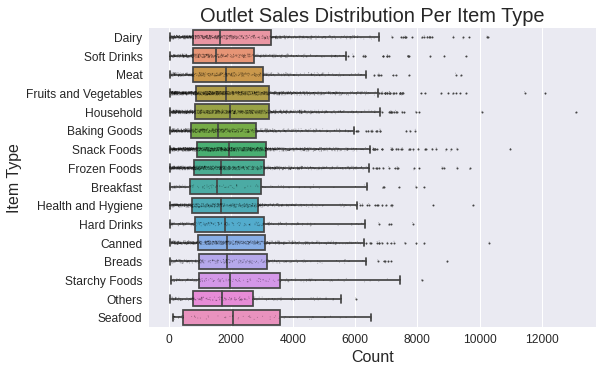

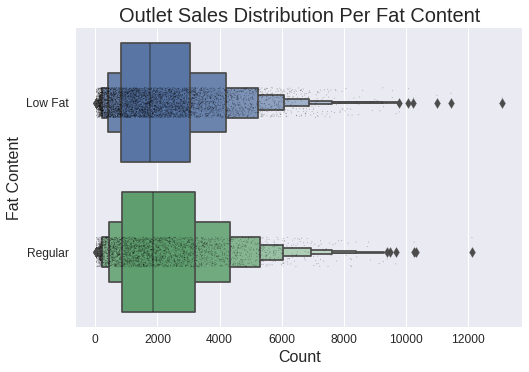

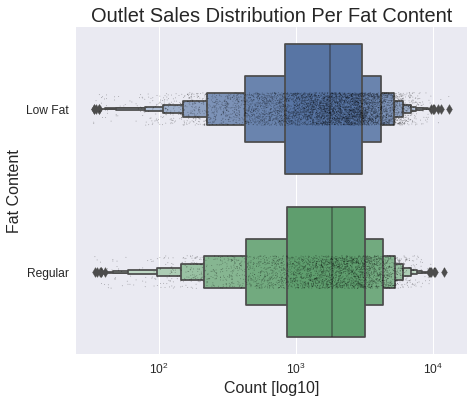

In [198]:
# test

# Boxplots of "Item_Outlet_Sales" data per "Item_Type" category
my_box_2 = sns.boxplot(x = df['Item_Outlet_Sales'], y = df['Item_Type'], data = df, flierprops= dict(marker = 'o', markersize = 1));
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'], y = df['Item_Type'], data = df,
              size=1, color="black", marker = 'o', alpha = 0.3)
plt.title("Outlet Sales Distribution Per Item Type", fontsize = 20);
plt.xlabel("Count", fontsize = 16);
plt.ylabel("Item Type", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Boxplots of "Item_Outlet_Sales" data per "Item_Fat_Content" category
my_box_2 = sns.boxenplot(x = df['Item_Outlet_Sales'], y = df['Item_Fat_Content'], data = df);
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'], y = df['Item_Fat_Content'], data = df,
              size=1, color="black", marker = 'o', alpha = 0.3)
plt.title("Outlet Sales Distribution Per Fat Content", fontsize = 20);
plt.xlabel("Count", fontsize = 16);
plt.ylabel("Fat Content", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()

# Boxplot after log transform
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log", basex = 10)
sns.boxenplot(x=df['Item_Outlet_Sales'], y=df['Item_Fat_Content'], data=df)
# Add in points to show each observation
sns.stripplot(x = df['Item_Outlet_Sales'], y = df['Item_Fat_Content'], data = df,
              size=1, color="black", marker = 'o', alpha = 0.3)
plt.title("Outlet Sales Distribution Per Fat Content", fontsize = 20);
plt.xlabel("Count [log10]", fontsize = 16);
plt.ylabel("Fat Content", fontsize = 16);
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.show()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009834,0.026241,-0.012702,0.013367
Item_Visibility,-0.009834,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.026241,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.012702,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013367,-0.128625,0.567574,-0.049135,1.000000


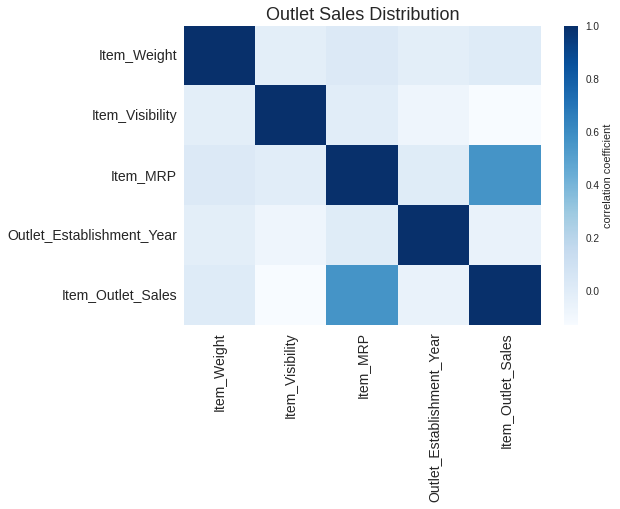

In [199]:
# 12) Create a heatmap of the correlation between numeric categories.
df_cor = df.corr()
display(df_cor)

sns.heatmap(df_cor, cmap = 'Blues', cbar_kws={'label': 'correlation coefficient'});
plt.title("Outlet Sales Distribution", fontsize = 18);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);



In [200]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [201]:
# filter out just refrigerated items: dairy, meat, and seafood

# dairy filter
dairy_fil = df['Item_Type'] == 'Dairy'
dairy_df = pd.DataFrame(df[dairy_fil])

# meat filter
meat_fil = df['Item_Type'] == 'Meat'
meat_df = pd.DataFrame(df[meat_fil])

# seafood filter
sea_fil = df['Item_Type'] == 'Seafood'
sea_df = pd.DataFrame(df[sea_fil])

# combine dataframes for single refrigerated items dataframe and reset and replace the index
fridge_items = pd.concat([dairy_df, meat_df, sea_df])
fridge_items.sort_values('Outlet_Type')
fridge_items.reset_index(drop=True, inplace=True)

display(fridge_items.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
2,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
3,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,High,Tier 3,Grocery Store,178.4344
4,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,High,Tier 3,Grocery Store,163.7868


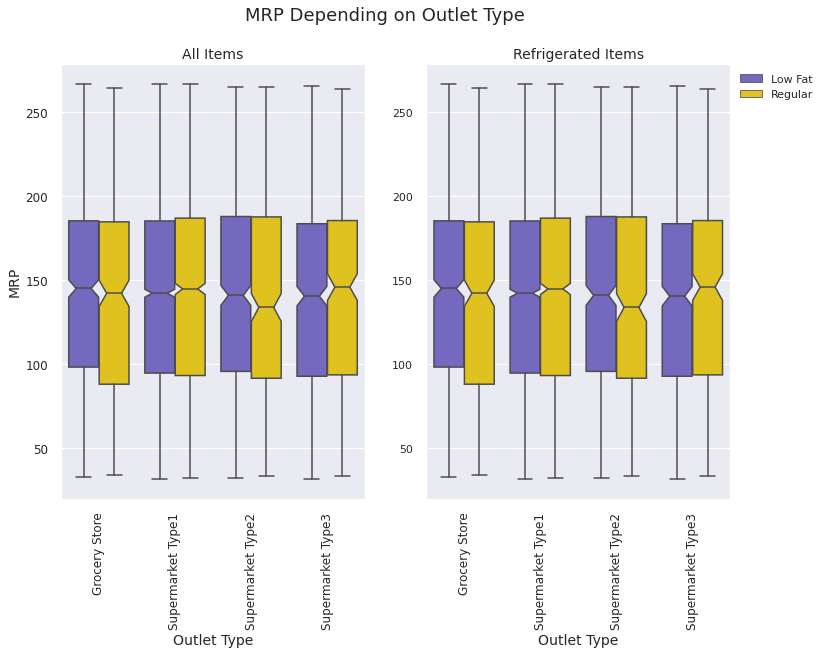

In [212]:

# set them and palette
sns.set_theme(style="darkgrid");
sns.color_palette('tab10');

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2);
fig.suptitle('MRP Depending on Outlet Type', fontsize=18);
fig.set_size_inches(12, 8)

# Plot 1:

# define plot location
plt.subplot(1, 2, 1);
# draw plot1
ord = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
ax1 = sns.boxplot(x = df['Outlet_Type'], 
                  y = df['Item_MRP'],
                  hue = df['Item_Fat_Content'],
                  data=df,
                  notch=True,
                  palette=["slateblue", "gold"],
                  order = ord);
# define title, labels, font sizes, and limits
plt.title('All Items', fontsize=14);
plt.xlabel('Outlet Type', fontsize=14);
plt.ylabel('MRP', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
# rotate x-axis labels to make them viewable
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90);
# remove legend from Plot1
ax1.get_legend().remove();

# Plot 2:
# define plot location
plt.subplot(1, 2, 2);
# draw plot1
ax2 = sns.boxplot(x = df['Outlet_Type'], 
                  y = df['Item_MRP'],
                  hue = df['Item_Fat_Content'],
                  data=df,
                  notch=True,
                  palette=["slateblue", "gold"],
                  order = ord);
# define title, labels, font sizes, and limits
plt.title('Refrigerated Items', fontsize=14);
plt.xlabel('Outlet Type', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks();
plt.ylabel('')

# rotate x-axis labels to make them viewable
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90);
# add legend from Plot2
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1));

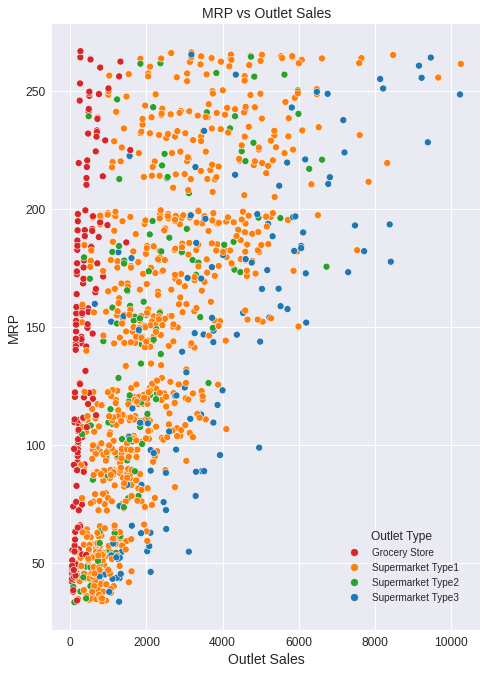

In [288]:
# create a box plot showing fat content distribution between refrigerated items

# set style for the plot
plt.style.use('seaborn');

# make a relplot to show Item MRP according to Item Outlet Sales according to Outlet Type
ord = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
palette = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
ax = sns.relplot(data=fridge_items,
            x=fridge_items['Item_Outlet_Sales'],
            y=fridge_items['Item_MRP'],
            hue=fridge_items['Outlet_Type'],
            hue_order = ord,
            palette = palette,
            legend = 'full'
            );

# define fonts, labels and titles
plt.title('MRP vs Outlet Sales', fontsize=14);
plt.xlabel('Outlet Sales', fontsize=14);
plt.ylabel('MRP', fontsize=14);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# set figure size
ax.fig.set_size_inches(10,10)

# set legend parameters
leg = ax._legend
leg.set_bbox_to_anchor([0.65, 0.15])
leg.set_title('Outlet Type')